In [1]:
import pandas as pd
import numpy as np

# Load and clean
df = pd.read_csv("w11/PracticalLab/data/Forbes2000.csv", encoding='ISO-8859-1', index_col=0)
df_clean = df[['sales', 'profits', 'assets', 'marketvalue']].dropna()

# Create binary target
median_mv = df_clean['marketvalue'].median()
df_clean['mv_class'] = np.where(df_clean['marketvalue'] >= median_mv, 'High', 'Low')


In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Features and target
X = df_clean[['sales', 'profits', 'assets']]
y = df_clean['mv_class']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

        High       0.84      0.76      0.80       301
         Low       0.78      0.85      0.81       298

    accuracy                           0.80       599
   macro avg       0.81      0.80      0.80       599
weighted avg       0.81      0.80      0.80       599

Accuracy: 0.8047


The values `test_size=0.3` and `random_state=42` in:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
```

aren’t “magical numbers” — they're commonly used **defaults for reproducibility and balance**, especially in teaching and experimentation.

---

### 🧠 Why `test_size=0.3`?

- `test_size=0.3` means **30% of the data goes to testing**, and **70% for training**.
- This **70/30 split** is a widely accepted practice:
  - It leaves enough data for training.
  - It gives a decent-sized test set to evaluate performance.
- You can also try other common ratios like:
  - `test_size=0.2` (80/20)
  - `test_size=0.25` (75/25)
- There’s no one right answer — you’d tune it based on your dataset size and use case.

---

### 🔒 Why `random_state=42`?

- `random_state` controls the **random seed**, ensuring that the **data is split the same way every time you run the code**.
- This makes your results **reproducible**, especially when working with peers or during grading.

> 🧩 Why 42?  
It’s a bit of an inside joke — 42 is the *Answer to the Ultimate Question of Life, the Universe, and Everything* from *The Hitchhiker’s Guide to the Galaxy* 🪐  
So it's become a **fun and harmless default** among data scientists and ML engineers.

---

### 🔁 TL;DR

- ✅ `test_size=0.3`: Common, balanced split between training and test sets.
- ✅ `random_state=42`: Makes your results reproducible and stable. You can use any integer (e.g. 1, 99, 1234), but 42 is the classic.

Let me know if you'd like to explore how the model performance changes if you tweak the split!

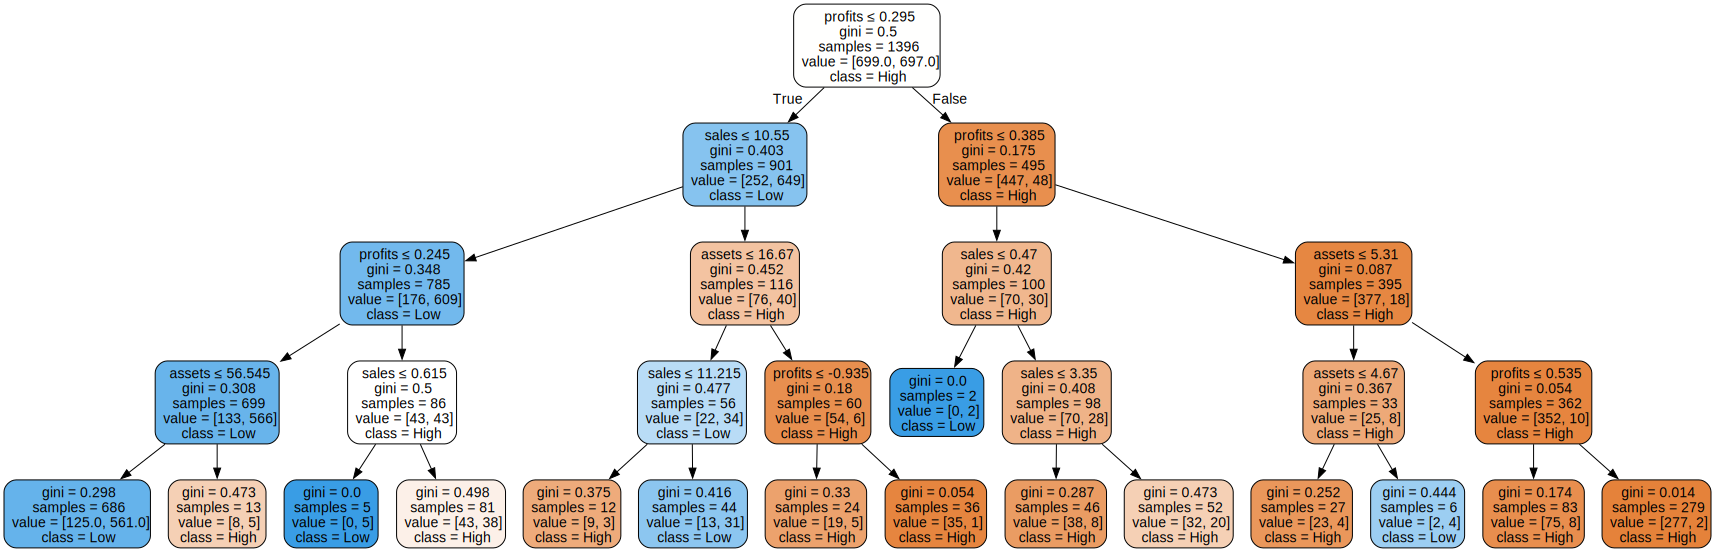

In [3]:
import graphviz
from sklearn.tree import export_graphviz

# Export tree to dot format
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=clf.classes_,  
                           filled=True, rounded=True,  
                           special_characters=True)

# Render and display
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save to file
graph  # Display in notebook


### 🧾 PE07-1-4 — Binary Classification of Market Value Using Decision Tree

In this task, we converted `marketvalue` into a **binary class**:
- `"High"` if `marketvalue` ≥ median
- `"Low"` if `marketvalue` < median

We trained a **Decision Tree Classifier** using `sales`, `profits`, and `assets` as predictors and evaluated its classification performance.

---

#### 🌳 Model Configuration
- **Classifier**: `DecisionTreeClassifier` from Scikit-Learn
- **Max Depth**: 4
- **Features Used**: sales, profits, assets
- **Train/Test Split**: 70/30
- **Visualization**: Rendered with Graphviz (see below)

![Decision Tree](decision_tree.png)

---

#### 🎯 Classification Performance

| Metric        | High Class | Low Class | Macro Avg |
|---------------|------------|-----------|-----------|
| **Precision** | 0.84       | 0.78      | **0.81**   |
| **Recall**    | 0.76       | 0.85      | **0.80**   |
| **F1-Score**  | 0.80       | 0.81      | **0.80**   |
| **Accuracy**  | —          | —         | **80.47%** ✅ |

The model shows **balanced precision and recall** across both classes, making it suitable for practical classification use.

---

### 🔍 Comparison with PE07-1-2 (Regression)

| Metric                        | Regression (PE07-1-2) | Classification (PE07-1-4) |
|-------------------------------|------------------------|----------------------------|
| Model Type                    | Point prediction       | Binary class prediction    |
| R²                            | 0.5435                 | N/A                        |
| RMSE                          | 16.54                  | N/A                        |
| Accuracy (or F1 score)        | N/A                    | **0.8047**                 |

---

### ✅ Conclusion

- The **multiple linear regression model** (PE07-1-2) is better suited for tasks requiring **precise market value prediction**.
- The **decision tree classifier** (PE07-1-4) is highly effective for **categorical decision-making**, such as quickly determining whether a company is in the top or bottom half of market value.
- With an accuracy of over 80%, the decision tree model demonstrates that **`sales`, `profits`, and `assets` are strong predictors** of general market value categories.

> For decision-making based on thresholds, the classification model is simple and interpretable.  
> For detailed financial predictions, regression models remain more suitable.

